In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pdb
import numpy as np

In [2]:
from inca.models.image import Image

In [3]:
i = Image.get(849555)
pan = i.get_panchromatic_asset()
pan.download_asset()


/tmp/d09f3a6a93ac4b4386b81042af43d46f.npz


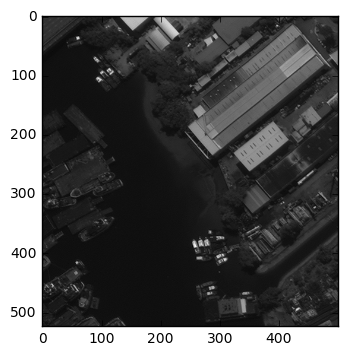

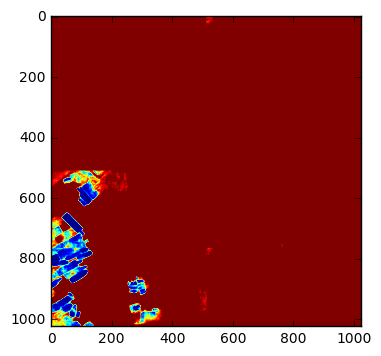

In [4]:
# Get Pan Image
pan_im = cv2.imread(pan.local_asset_path,-1)
plt.imshow(pan_im[500:,0:500],cmap=plt.get_cmap('gray'))

# Get Predicted Heatmap
plt.figure()
probs,_,hm,cm =i.get_prediction_assets(10972)
hm.download_asset()
hm_im = cv2.imread(hm.local_asset_path)
plt.imshow(hm_im,cmap=plt.get_cmap('gray'))

#Get Ground Truth Mask (cant figure out how to get it, so getting from confusion matrix)
plt.figure()
cm.download_asset()
cm_im = cv2.imread(cm.local_asset_path)

#Get Raw probs
probs.download_asset()
print probs.local_asset_path


In [5]:
test1_im = pan_im[500:1000,0:500]
test1_hm = hm_im[500:1000,0:500]
test1_cm = cm_im[500:1000,0:500]
probs_im = np.load(probs.local_asset_path)['arr_0']
test1_probs = probs_im[500:1000,0:500]

In [124]:
## CRF Realted stuff
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral, create_pairwise_gaussian, unary_from_softmax
d = dcrf.DenseCRF2D(500, 500, 1)
U = -np.log(test1_probs + 0.0000001)
U = U.reshape((1,-1))
print U.dtype
d.setUnaryEnergy(unary_from_softmax(U))
d.addPairwiseGaussian(sxy=(3,3), compat=3, kernel=dcrf.DIAG_KERNEL, normalization=dcrf.NORMALIZE_SYMMETRIC)


Q = d.inference(50)
map = np.argmax(Q, axis=0).reshape((500,500))
proba = np.array(Q)
print np.max(proba), np.min(proba)
plt.imshow(proba.reshape(500,500),cmap=plt.get_cmap('gray'))


float16


IndexError: index 1 is out of bounds for axis 0 with size 1

In [8]:
import pydensecrf.densecrf as dcrf
from pydensecrf.utils import unary_from_labels, create_pairwise_bilateral, create_pairwise_gaussian, unary_from_softmax, softmax_to_unary

In [7]:
test1_probs.shape

(500, 500)

In [9]:
unary = softmax_to_unary(test1_probs)


/home/ubuntu/anaconda/lib/python2.7/site-packages/pydensecrf/utils.py:79: RuntimeWarning: divide by zero encountered in log
  return -np.log(sm).reshape([num_cls, -1]).astype(np.float32)


In [10]:
unary = np.ascontiguousarray(unary)

In [13]:
d = dcrf.DenseCRF(500,500, 1)

In [14]:
d.setUnaryEnergy(unary)

In [25]:
feats = create_pairwise_gaussian(sdims=(3, 3),shape=test1_im.shape[1:])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [24]:
test1_im.shape[2:]

()

In [26]:
d.addPairwiseGaussian(sxy=(3,3), compat=3, kernel=dcrf.DIAG_KERNEL, normalization=dcrf.NORMALIZE_SYMMETRIC)

AttributeError: 'pydensecrf.densecrf.DenseCRF' object has no attribute 'addPairwiseGaussian'

In [59]:
d2 = dcrf.DenseCRF2D(500, 500, 1) 

In [60]:
unary = -np.log(test1_probs + 0.0000001)

In [61]:
unary = softmax_to_unary(test1_probs.reshape(1,-1))
unary = np.ascontiguousarray(unary)
d2.setUnaryEnergy(unary)

In [62]:
d2.addPairwiseGaussian(sxy=3, compat=3)

In [71]:
Q=d.inference(50)

In [72]:
res = np.argmax(Q, axis=0).reshape((500,500))

ValueError: cannot reshape array of size 500 into shape (500,500)

In [73]:
Q.shape

AttributeError: 'pydensecrf.eigen.MatrixXf' object has no attribute 'shape'

In [74]:
proba=np.array(Q)

In [75]:
proba.shape

(500, 500)

In [76]:
print np.max(proba)

0.193167


In [80]:
proba_copy=np.copy(proba)

In [81]:
proba_copy=proba_copy/np.max(proba_copy)

In [82]:
np.max(proba_copy)

1.0

In [83]:
np.min(proba_copy)

0.0

In [84]:
proba_copy=proba_copy*255.0

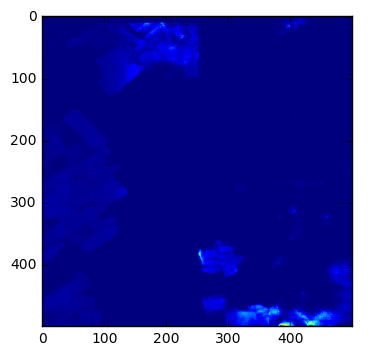

In [86]:
plt.imshow(proba_copy)

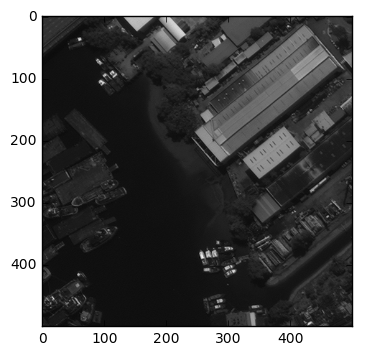

In [58]:
plt.imshow(test1_im,cmap=plt.get_cmap('gray'))

In [53]:
d3 = dcrf.DenseCRF(500*500, 1) 

In [54]:
unary = softmax_to_unary(test1_probs.reshape(1,-1))
unary = np.ascontiguousarray(unary)
d3.setUnaryEnergy(unary)

In [55]:
d3.addPairwiseGaussian(sxy=3, compat=3)

AttributeError: 'pydensecrf.densecrf.DenseCRF' object has no attribute 'addPairwiseGaussian'

In [87]:
from pydensecrf.utils import unary_from_softmax, create_pairwise_bilateral

In [91]:
pairwise_energy = create_pairwise_bilateral(sdims=(80,80), schan=(13,), img=test1_im, chdim=-1)

In [88]:
create_pairwise_bilateral?

In [89]:
test1_im.shape

(500, 500)

In [93]:
d2.addPairwiseEnergy(pairwise_energy,compat=10)

In [94]:
Q=d.inference(50)

In [95]:
proba=np.array(Q)

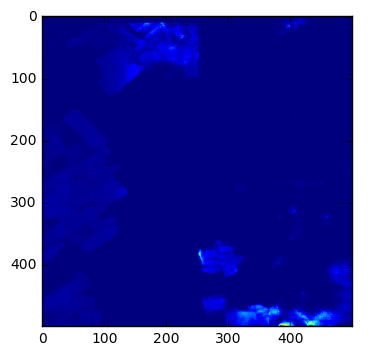

In [96]:
plt.imshow(proba)

In [97]:
np.max(proba)

0.19316731

In [98]:
aa=test1_probs.reshape((1,-1))

In [99]:
aa.shape

(1, 250000)